In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt

import seaborn as sns
color_palette = sns.color_palette()
plt.style.use('fivethirtyeight')

from IPython.display import clear_output, display

In [2]:
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data.set_index("date", inplace=True)
data.index = pd.to_datetime(data.index)

train = data[data.index <= '2015-12-31 23:59:59']
test = data[data.index > '2015-12-31 23:59:59']

train["meantemp"].head(10)

date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
2013-01-06     7.000000
2013-01-07     7.000000
2013-01-08     8.857143
2013-01-09    14.000000
2013-01-10    11.000000
Name: meantemp, dtype: float64

<AxesSubplot: xlabel='date'>

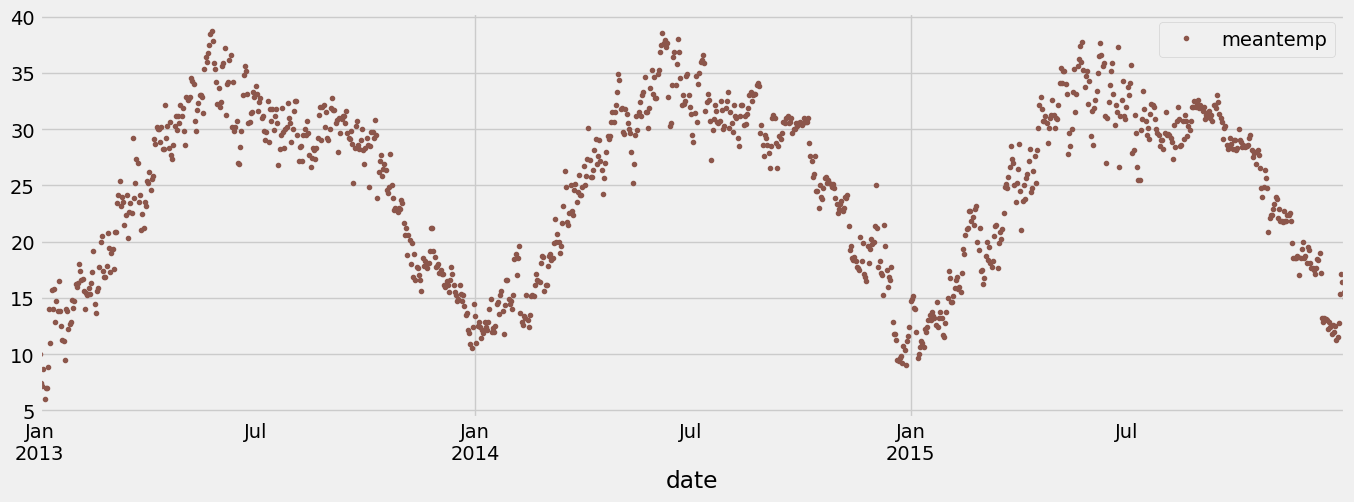

In [3]:
train.plot(y='meantemp', figsize=(15, 5), style='.', color=color_palette[5])

<AxesSubplot: xlabel='date'>

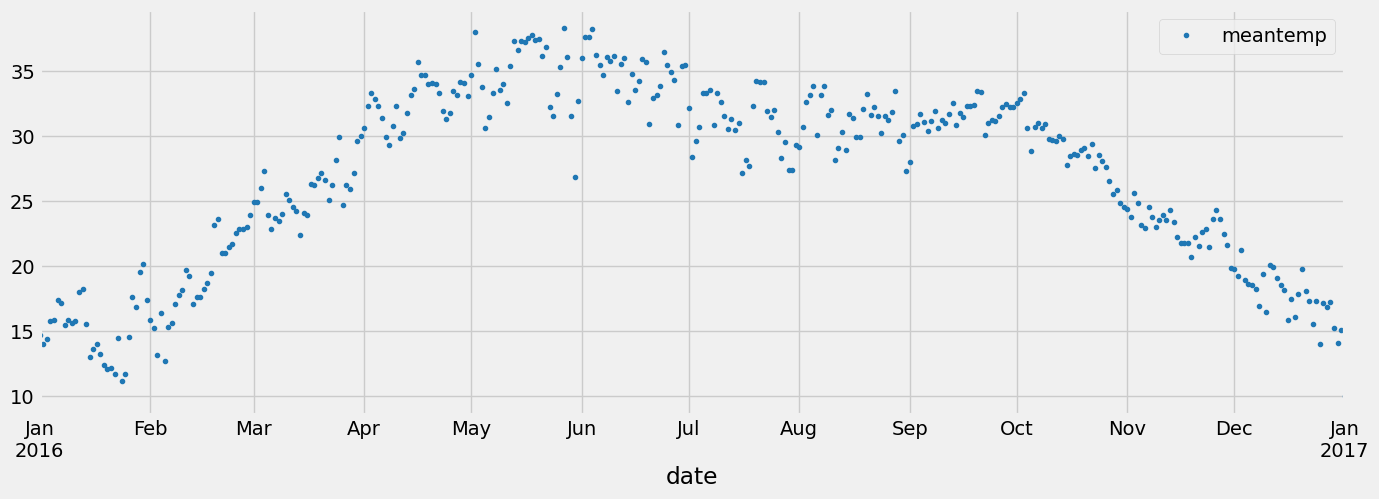

In [4]:
test.plot(y='meantemp', figsize=(15, 5), style='.', color=color_palette[0])

## ARIMA

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
history = [x for x in train["meantemp"]]
predictions = list()

count = 1
for t in range(len(test)):
    
    clear_output(wait=True)
    
    # fit models
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test["meantemp"][t]
    history.append(obs)
    print('progress=%f, predicted=%f, expected=%f' % (int((((count/len(test)) * 100))), yhat, obs))
    count += 1

progress=100.000000, predicted=15.290827, expected=10.000000


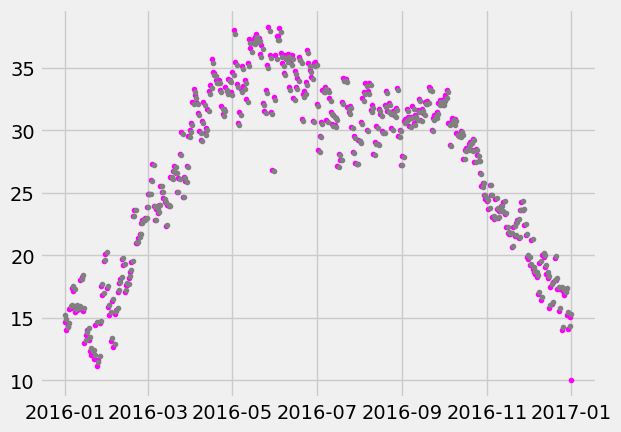

In [7]:
test["pred"] = predictions
plt.plot(test["meantemp"], color='magenta', linestyle = 'None', marker = "." )
plt.plot(test["pred"], color='gray', linestyle = 'None', marker = ".")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test["meantemp"], predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.651


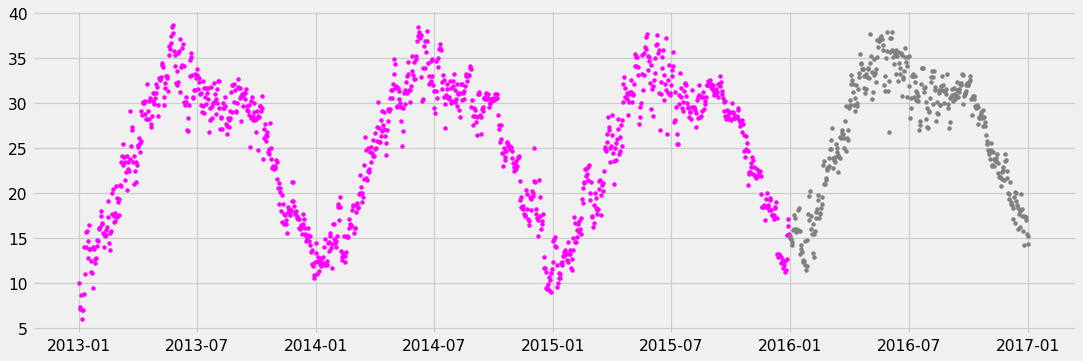

In [9]:
from matplotlib.pyplot import figure

figure(figsize=(15, 5), dpi=80)

plt.plot(train["meantemp"], color='magenta', linestyle = 'None', marker = "." )
plt.plot(test["pred"], color='gray', linestyle = 'None', marker = ".")